In [46]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

# Data reading and preprocessing 

In [47]:
# Read from the dataset
df = pd.read_csv("./nyc-property-sales.csv")


df.head()


C:\Users\genji\AppData\Local\Temp\ipykernel_19748\2373327921.py:2: DtypeWarning: Columns (0,4,5,6,10,11,12,13,14,15,16,17,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./nyc-property-sales.csv")


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,374,46,NaN,A4,347 EAST 4TH STREET,NaN,...,1.0,0.0,1.0,2116.0,4400.0,1900.0,1,A4,399000,2022-09-29 00:00:00
1,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,377,1,NaN,S2,110 AVENUE C,NaN,...,2.0,1.0,3.0,1502.0,2790.0,1901.0,1,S2,2999999,2022-09-15 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,373,16,NaN,C1,326 EAST 4TH STREET,NaN,...,10.0,0.0,10.0,2204.0,8625.0,1899.0,2,C1,16800000,2022-08-04 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,373,17,NaN,C1,328 EAST 4TH STREET,NaN,...,10.0,0.0,10.0,2204.0,8625.0,1900.0,2,C1,16800000,2022-08-04 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376,54,NaN,C4,"719 EAST SIXTH STREET, 1B",NaN,...,20.0,0.0,20.0,2302.0,9750.0,1900.0,2,C4,158822,2022-09-27 00:00:00


In [48]:
df_filtered= df[['BOROUGH','NEIGHBORHOOD','ADDRESS','LAND SQUARE FEET','GROSS SQUARE FEET','YEAR BUILT','SALE PRICE','SALE DATE']]

df_filtered.head()



,BOROUGH,NEIGHBORHOOD,ADDRESS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,347 EAST 4TH STREET,2116.0,4400.0,1900.0,399000,2022-09-29 00:00:00
1,1,ALPHABET CITY,110 AVENUE C,1502.0,2790.0,1901.0,2999999,2022-09-15 00:00:00
2,1,ALPHABET CITY,326 EAST 4TH STREET,2204.0,8625.0,1899.0,16800000,2022-08-04 00:00:00
3,1,ALPHABET CITY,328 EAST 4TH STREET,2204.0,8625.0,1900.0,16800000,2022-08-04 00:00:00
4,1,ALPHABET CITY,"719 EAST SIXTH STREET, 1B",2302.0,9750.0,1900.0,158822,2022-09-27 00:00:00


In [49]:
# Data cleaning 
df_filtered = df_filtered.drop_duplicates()

# Remove rows with any null values
df_filtered = df_filtered.dropna()

df_filtered['BOROUGH'] = pd.to_numeric(df_filtered['BOROUGH'],errors='coerce',downcast='integer')

df_filtered['LAND SQUARE FEET'] = pd.to_numeric(df_filtered['LAND SQUARE FEET'],errors='coerce')

df_filtered['GROSS SQUARE FEET'] = pd.to_numeric(df_filtered['GROSS SQUARE FEET'],errors='coerce')

df_filtered['YEAR BUILT'] = pd.to_numeric(df_filtered['YEAR BUILT'],errors='coerce')

df_filtered['SALE PRICE'] = pd.to_numeric(df_filtered['SALE PRICE'],errors='coerce')



# Filter out rows where SALE PRICE is less than 100
df_filtered = df_filtered[df_filtered['SALE PRICE'] > 100]

df_filtered.head()


,BOROUGH,NEIGHBORHOOD,ADDRESS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE
0,1.0,ALPHABET CITY,347 EAST 4TH STREET,2116.0,4400.0,1900.0,399000.0,2022-09-29 00:00:00
1,1.0,ALPHABET CITY,110 AVENUE C,1502.0,2790.0,1901.0,2999999.0,2022-09-15 00:00:00
2,1.0,ALPHABET CITY,326 EAST 4TH STREET,2204.0,8625.0,1899.0,16800000.0,2022-08-04 00:00:00
3,1.0,ALPHABET CITY,328 EAST 4TH STREET,2204.0,8625.0,1900.0,16800000.0,2022-08-04 00:00:00
4,1.0,ALPHABET CITY,"719 EAST SIXTH STREET, 1B",2302.0,9750.0,1900.0,158822.0,2022-09-27 00:00:00


In [50]:
borough_mapping = {
    1: "Manhattan",
    2: "Bronx",
    3: "Brooklyn",
    4: "Queen",
    5: "Staten Island"
}

df_filtered['BOROUGH'] = df_filtered['BOROUGH'].map(borough_mapping)

df_filtered.head()

,BOROUGH,NEIGHBORHOOD,ADDRESS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,347 EAST 4TH STREET,2116.0,4400.0,1900.0,399000.0,2022-09-29 00:00:00
1,Manhattan,ALPHABET CITY,110 AVENUE C,1502.0,2790.0,1901.0,2999999.0,2022-09-15 00:00:00
2,Manhattan,ALPHABET CITY,326 EAST 4TH STREET,2204.0,8625.0,1899.0,16800000.0,2022-08-04 00:00:00
3,Manhattan,ALPHABET CITY,328 EAST 4TH STREET,2204.0,8625.0,1900.0,16800000.0,2022-08-04 00:00:00
4,Manhattan,ALPHABET CITY,"719 EAST SIXTH STREET, 1B",2302.0,9750.0,1900.0,158822.0,2022-09-27 00:00:00


# Data Visualization: 

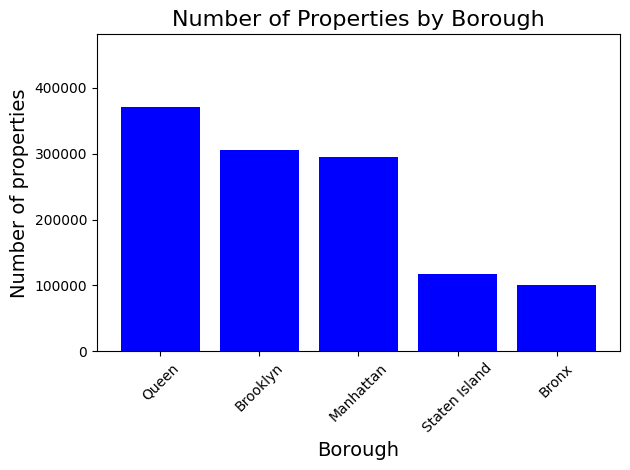

In [51]:
borough_count = df_filtered['BOROUGH'].value_counts()
borough_count

y_max = borough_count.max() * 1.3


plt.bar(borough_count.index,borough_count,color='blue')
plt.title('Number of Properties by Borough', fontsize=16)
plt.xlabel('Borough', fontsize=14)
plt.ylim(0,y_max)
plt.ylabel('Number of properties', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [52]:
price_ranges = [
    (0, 500000, "Under $500K"),
    (500000, 1000000, "$500K-$1M"),
    (1000000, 2000000, "$1M-$2M"),
    (2000000, 5000000, "$2M-$5M"),
    (5000000, 10000000, "$5M-$10M"),
    (10000000, float('inf'), "Over $10M")
]

price_range_order = ["Under $500K", "$500K-$1M", "$1M-$2M", "$2M-$5M", "$5M-$10M", "Over $10M"]

def get_price_category(price):
    for low, high, label in price_ranges:
        if low <= price < high:
            return label
    return "Over $10M" 

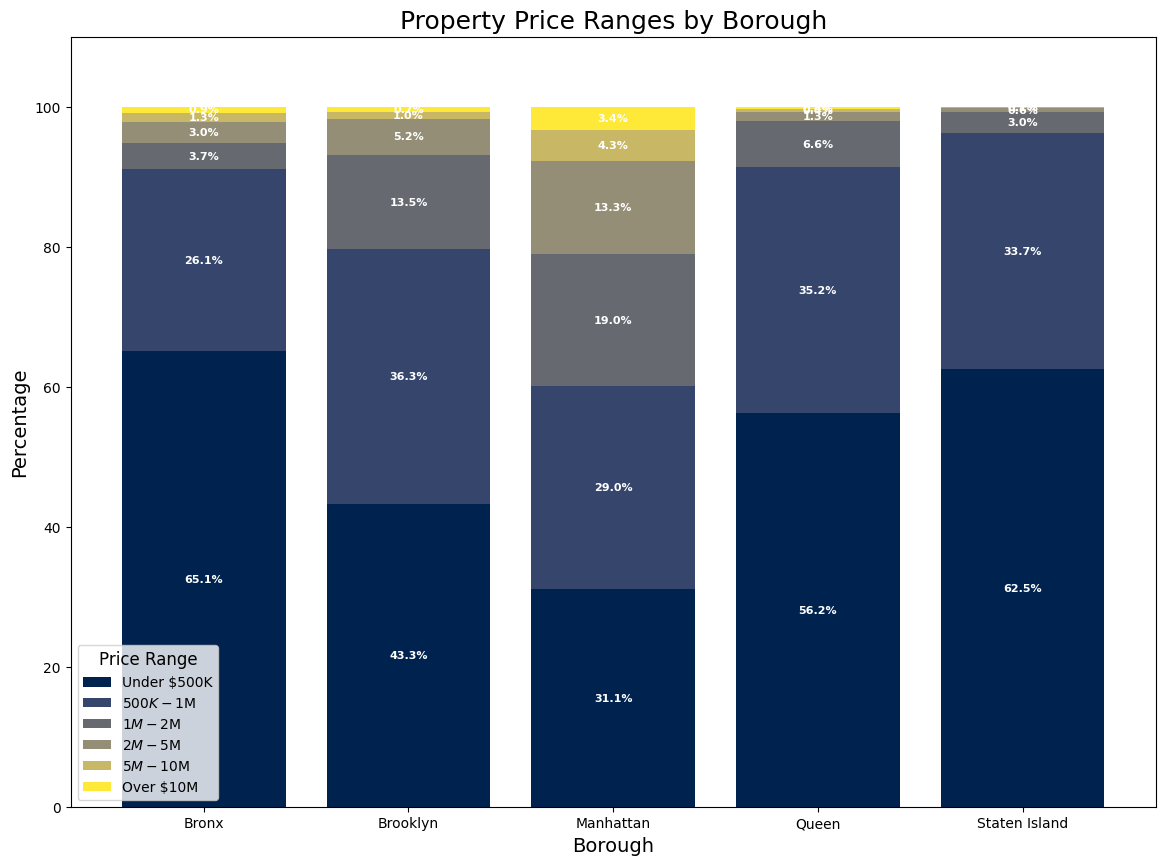

In [53]:
crosstab_data = pd.crosstab(
    index=df_filtered['BOROUGH'],
    columns=pd.cut(
        df_filtered['SALE PRICE'], 
        bins=[0, 500000, 1000000, 2000000, 5000000, 10000000, float('inf')],
        labels=price_range_order
    )
)

# Calculate percentages by row (borough)
percentage_data = crosstab_data.div(crosstab_data.sum(axis=1), axis=0) * 100

ax = percentage_data.plot(
    kind='bar', 
    stacked=True, 
    colormap='cividis', 
    figsize=(14, 10),
    width=0.8 
)

for i, (name, row) in enumerate(percentage_data.iterrows()):
    cumulative_sum = 0
    for j, value in enumerate(row):
        ax.text(
                i, 
                cumulative_sum + (value/2), 
                f"{value:.1f}%", 
                ha='center', 
                va='center',
                fontweight='bold',
                color='white',
                fontsize=8
        )
        cumulative_sum += value

# Enhance the chart appearance
plt.title('Property Price Ranges by Borough', fontsize=18)
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Price Range', title_fontsize=12)
plt.ylim(0,110)
plt.show()

# The data is broken down into five different sets of data for each borough.

In [54]:
Manhattan = df_filtered[df_filtered['BOROUGH'] == "Manhattan"]
Manhattan.info()

Bronx = df_filtered[df_filtered['BOROUGH'] == "Bronx"]
Bronx.info()

Brooklyn = df_filtered[df_filtered['BOROUGH'] == "Brooklyn"]
Brooklyn.info()

Queens =  df_filtered[df_filtered['BOROUGH'] == "Queen"]
Queens.info()

Staten_island = df_filtered[df_filtered['BOROUGH'] == "Staten Island"]
Staten_island.info()

<class 'pandas.core.frame.DataFrame'>
Index: 294950 entries, 0 to 1939004
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   BOROUGH            294950 non-null  object 
 1   NEIGHBORHOOD       294950 non-null  object 
 2   ADDRESS            294950 non-null  object 
 3   LAND SQUARE FEET   294950 non-null  float64
 4   GROSS SQUARE FEET  294950 non-null  float64
 5   YEAR BUILT         294950 non-null  float64
 6   SALE PRICE         294950 non-null  float64
 7   SALE DATE          294950 non-null  object 
dtypes: float64(4), object(4)
memory usage: 20.3+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 100880 entries, 21787 to 1939610
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   BOROUGH            100880 non-null  object 
 1   NEIGHBORHOOD       100880 non-null  object 
 2   ADDRESS            100880 non-null  obje

# Model Implementation and Evaluation

## Linear regression model implementations and evaluations for all boroughs

In [55]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [56]:
features = ['LAND SQUARE FEET','GROSS SQUARE FEET','YEAR BUILT']
target = ['SALE PRICE']


### Manhattan

In [57]:
X = Manhattan[features]
y = Manhattan[target]


# Split the data into training and testing sets and scale features.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

#Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Linear Regression Model Results:")
print("\nTraining Set Metrics:")
print(f"MSE: ${train_mse:.2f}")
print(f"RMSE: ${train_rmse:.2f}")
print(f"MAE: ${train_mae:.2f}")
print(f"R²: {train_r2:.4f}")

print("\nTest Set Metrics:")
print(f"MSE: ${test_mse:.2f}")
print(f"RMSE: ${test_rmse:.2f}")
print(f"MAE: ${test_mae:.2f}")
print(f"R²: {test_r2:.4f}")


Linear Regression Model Results:

Training Set Metrics:
MSE: $522708423272063.31
RMSE: $22862817.48
MAE: $3501323.67
R²: 0.3974

Test Set Metrics:
MSE: $533896893281035.56
RMSE: $23106208.98
MAE: $3402049.21
R²: -0.0800


### Bronx

In [58]:
X = Bronx[features]
y = Bronx[target]

# Split the data into training and testing sets and scale features.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Linear Regression Model Results:")
print("\nTraining Set Metrics:")
print(f"MSE: ${train_mse:.2f}")
print(f"RMSE: ${train_rmse:.2f}")
print(f"MAE: ${train_mae:.2f}")
print(f"R²: {train_r2:.4f}")

print("\nTest Set Metrics:")
print(f"MSE: ${test_mse:.2f}")
print(f"RMSE: ${test_rmse:.2f}")
print(f"MAE: ${test_mae:.2f}")
print(f"R²: {test_r2:.4f}")

Linear Regression Model Results:

Training Set Metrics:
MSE: $7203752979854.50
RMSE: $2683980.81
MAE: $614987.16
R²: 0.1543

Test Set Metrics:
MSE: $8603200066871.41
RMSE: $2933121.22
MAE: $624121.29
R²: 0.1743


### Brooklyn

In [59]:
X = Brooklyn[features]
y = Brooklyn[target]

# Split the data into training and testing sets and scale features.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

#Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Linear Regression Model Results:")
print("\nTraining Set Metrics:")
print(f"MSE: ${train_mse:.2f}")
print(f"RMSE: ${train_rmse:.2f}")
print(f"MAE: ${train_mae:.2f}")
print(f"R²: {train_r2:.4f}")

print("\nTest Set Metrics:")
print(f"MSE: ${test_mse:.2f}")
print(f"RMSE: ${test_rmse:.2f}")
print(f"MAE: ${test_mae:.2f}")
print(f"R²: {test_r2:.4f}")

Linear Regression Model Results:

Training Set Metrics:
MSE: $12923440768637.25
RMSE: $3594918.74
MAE: $753761.73
R²: 0.0909

Test Set Metrics:
MSE: $18379938495807.81
RMSE: $4287183.05
MAE: $746800.57
R²: 0.0861


### Queens

In [60]:
X = Queens[features]
y = Queens[target]

# Split the data into training and testing sets and scale features.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

#Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Linear Regression Model Results:")
print("\nTraining Set Metrics:")
print(f"MSE: ${train_mse:.2f}")
print(f"RMSE: ${train_rmse:.2f}")
print(f"MAE: ${train_mae:.2f}")
print(f"R²: {train_r2:.4f}")

print("\nTest Set Metrics:")
print(f"MSE: ${test_mse:.2f}")
print(f"RMSE: ${test_rmse:.2f}")
print(f"MAE: ${test_mae:.2f}")
print(f"R²: {test_r2:.4f}")

Linear Regression Model Results:

Training Set Metrics:
MSE: $13436241463882.10
RMSE: $3665547.91
MAE: $443340.38
R²: 0.0837

Test Set Metrics:
MSE: $7902721678676.02
RMSE: $2811177.99
MAE: $426029.13
R²: 0.0539


### Staten island

In [61]:
X = Staten_island[features]
y = Staten_island[target]

# Split the data into training and testing sets and scale features.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

#Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Linear Regression Model Results:")
print("\nTraining Set Metrics:")
print(f"MSE: ${train_mse:.2f}")
print(f"RMSE: ${train_rmse:.2f}")
print(f"MAE: ${train_mae:.2f}")
print(f"R²: {train_r2:.4f}")

print("\nTest Set Metrics:")
print(f"MSE: ${test_mse:.2f}")
print(f"RMSE: ${test_rmse:.2f}")
print(f"MAE: ${test_mae:.2f}")
print(f"R²: {test_r2:.4f}")

Linear Regression Model Results:

Training Set Metrics:
MSE: $856845930847.99
RMSE: $925659.73
MAE: $217596.24
R²: 0.2236

Test Set Metrics:
MSE: $1493476003998.74
RMSE: $1222078.56
MAE: $227411.13
R²: 0.2202


## Random Forest regression model implementations and evaluations for all boroughs

In [62]:
from sklearn.ensemble import RandomForestRegressor


### Manhattan 

In [63]:
X = Manhattan[features]
y = Manhattan[target]

# Remove extreme sale price outliers
filtered_data = Manhattan[Manhattan['SALE PRICE'] < Manhattan['SALE PRICE'].quantile(0.99)]
X = filtered_data[features]
y = filtered_data['SALE PRICE']

# # Split the data into training and testing sets and scale features.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

#Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Random Forest Model Results:")

print("\nTraining Set Metrics:")
print(f"MSE: ${train_mse:.2f}")
print(f"RMSE: ${train_rmse:.2f}")
print(f"MAE: ${train_mae:.2f}")
print(f"R²: {train_r2:.4f}")

print("\nTest Set Metrics:")
print(f"MSE: ${test_mse:.2f}")
print(f"RMSE: ${test_rmse:.2f}")
print(f"MAE: ${test_mae:.2f}")
print(f"R²: {test_r2:.4f}")


Random Forest Model Results:

Training Set Metrics:
MSE: $4038478049635.62
RMSE: $2009596.49
MAE: $1024879.04
R²: 0.5248

Test Set Metrics:
MSE: $5777192837413.94
RMSE: $2403579.17
MAE: $1176805.29
R²: 0.3128


### Bronx

In [64]:
X = Bronx[features]
y = Bronx[target]

# Remove extreme sale price outliers
filtered_data = Bronx[Bronx['SALE PRICE'] < Bronx['SALE PRICE'].quantile(0.99)]
X = filtered_data[features]
y = filtered_data['SALE PRICE']

# # Split the data into training and testing sets and scale features.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

#Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Random Forest Model Results:")

print("\nTraining Set Metrics:")
print(f"MSE: ${train_mse:.2f}")
print(f"RMSE: ${train_rmse:.2f}")
print(f"MAE: ${train_mae:.2f}")
print(f"R²: {train_r2:.4f}")

print("\nTest Set Metrics:")
print(f"MSE: ${test_mse:.2f}")
print(f"RMSE: ${test_rmse:.2f}")
print(f"MAE: ${test_mae:.2f}")
print(f"R²: {test_r2:.4f}")


Random Forest Model Results:

Training Set Metrics:
MSE: $103467470865.43
RMSE: $321663.60
MAE: $150253.11
R²: 0.8742

Test Set Metrics:
MSE: $314144167159.25
RMSE: $560485.65
MAE: $250916.41
R²: 0.5923


### Brooklyn

In [65]:
X = Brooklyn[features]
y = Brooklyn[target]

# Remove extreme sale price outliers
filtered_data = Brooklyn[Brooklyn['SALE PRICE'] < Brooklyn['SALE PRICE'].quantile(0.99)]
X = filtered_data[features]
y = filtered_data['SALE PRICE']

# # Split the data into training and testing sets and scale features.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

#Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Random Forest Model Results:")

print("\nTraining Set Metrics:")
print(f"MSE: ${train_mse:.2f}")
print(f"RMSE: ${train_rmse:.2f}")
print(f"MAE: ${train_mae:.2f}")
print(f"R²: {train_r2:.4f}")

print("\nTest Set Metrics:")
print(f"MSE: ${test_mse:.2f}")
print(f"RMSE: ${test_rmse:.2f}")
print(f"MAE: ${test_mae:.2f}")
print(f"R²: {test_r2:.4f}")


Random Forest Model Results:

Training Set Metrics:
MSE: $200370986920.06
RMSE: $447628.18
MAE: $270975.68
R²: 0.7009

Test Set Metrics:
MSE: $462528606539.94
RMSE: $680094.56
MAE: $398572.53
R²: 0.2985


### Queens

In [66]:
X = Queens[features]
y = Queens[target]

# Remove extreme sale price outliers
filtered_data = Queens[Queens['SALE PRICE'] < Queens['SALE PRICE'].quantile(0.99)]
X = filtered_data[features]
y = filtered_data['SALE PRICE']

# # Split the data into training and testing sets and scale features.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

#Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Random Forest Model Results:")

print("\nTraining Set Metrics:")
print(f"MSE: ${train_mse:.2f}")
print(f"RMSE: ${train_rmse:.2f}")
print(f"MAE: ${train_mae:.2f}")
print(f"R²: {train_r2:.4f}")

print("\nTest Set Metrics:")
print(f"MSE: ${test_mse:.2f}")
print(f"RMSE: ${test_rmse:.2f}")
print(f"MAE: ${test_mae:.2f}")
print(f"R²: {test_r2:.4f}")


Random Forest Model Results:

Training Set Metrics:
MSE: $41057816907.04
RMSE: $202627.29
MAE: $130769.32
R²: 0.7396

Test Set Metrics:
MSE: $95554712316.27
RMSE: $309119.25
MAE: $198053.58
R²: 0.4050


### Staten_island

In [67]:
X = Staten_island[features]
y = Staten_island[target]

# Remove extreme sale price outliers
filtered_data = Staten_island[Staten_island['SALE PRICE'] < Staten_island['SALE PRICE'].quantile(0.99)]
X = filtered_data[features]
y = filtered_data['SALE PRICE']

# # Split the data into training and testing sets and scale features.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

#Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Random Forest Model Results:")

print("\nTraining Set Metrics:")
print(f"MSE: ${train_mse:.2f}")
print(f"RMSE: ${train_rmse:.2f}")
print(f"MAE: ${train_mae:.2f}")
print(f"R²: {train_r2:.4f}")

print("\nTest Set Metrics:")
print(f"MSE: ${test_mse:.2f}")
print(f"RMSE: ${test_rmse:.2f}")
print(f"MAE: ${test_mae:.2f}")
print(f"R²: {test_r2:.4f}")


Random Forest Model Results:

Training Set Metrics:
MSE: $11083480050.51
RMSE: $105278.11
MAE: $73717.91
R²: 0.8184

Test Set Metrics:
MSE: $33605671137.92
RMSE: $183318.50
MAE: $129091.14
R²: 0.4407
